### 1. 라이브러리 & 데이터 리딩

In [73]:
# 수치화를 위한 라이브러리 
import pandas as pd 
import numpy as np 

# 시각화를 위한 라이브러리 
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# 한글 깨짐 방지
from matplotlib import rc
rc('font', family ='AppleGothic')

In [75]:
jeju_reg_17_df = pd.read_csv('data-2/jeju_card_region_2017.csv')
jeju_reg_18_df = pd.read_csv('data-2/jeju_card_region_2018.csv')
jeju_pop_df = pd.read_csv('data-2/jeju_population.csv')

### 2. 결측치 및 칼럼처리 

#### 결측치 및 unique 값 확인

In [76]:
print(jeju_reg_17_df.shape)
print(jeju_reg_18_df.shape)
print(jeju_pop_df.shape)

(26968, 7)
(27183, 7)
(527026, 6)


In [77]:
jeju_reg_17_df.head()

,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액
0,2017-01-01,서귀포시,남원읍,건강보조식품 소매업,남성,11,137500
1,2017-01-01,서귀포시,천지동,건강보조식품 소매업,여성,61,12334400
2,2017-01-01,서귀포시,대정읍,기타음식료품위주종합소매업,남성,555,17301300
3,2017-01-01,서귀포시,대정읍,기타 주점업,남성,324,71843080
4,2017-01-01,서귀포시,대정읍,기타 외국식 음식점업,남성,40,971000


In [78]:
jeju_reg_18_df.head()

,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액
0,2018-01-01,제주시,아라동,차량용 주유소 운영업,남성,3954,205339045
1,2018-01-01,제주시,삼도1동,차량용 주유소 운영업,남성,490,29469792
2,2018-01-01,제주시,삼도2동,육류 소매업,여성,89,2386740
3,2018-01-01,제주시,삼도1동,스포츠 및 레크레이션 용품 임대업,남성,106,12517300
4,2018-01-01,제주시,삼도1동,수산물 소매업,남성,37,2621000


In [79]:
jeju_pop_df.head()
# 연월방문 인구 데이터 

,연월일,시군구명,읍면동명,성별,연령대,방문인구
0,20170101,제주시,한림읍,남,40대,19424
1,20170101,제주시,애월읍,여,20대,27747
2,20170101,제주시,구좌읍,남,70대,3459
3,20170101,제주시,조천읍,남,40대,36695
4,20170101,제주시,한경면,남,70대,1174


In [80]:
print(jeju_pop_df.loc[527025])
# 마지막  2018년 12월 31일 자료 

연월일     20181231
시군구명        서귀포시
읍면동명         예래동
성별             여
연령대          50대
방문인구       12314
Name: 527025, dtype: object


In [81]:
jeju_reg_17_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26968 entries, 0 to 26967
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연월      26968 non-null  object
 1   시군구명    26968 non-null  object
 2   읍면동명    26968 non-null  object
 3   업종명     26968 non-null  object
 4   성별      26968 non-null  object
 5   이용자수    26968 non-null  int64 
 6   이용금액    26968 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [82]:
jeju_reg_17_df.isnull().sum()

연월      0
시군구명    0
읍면동명    0
업종명     0
성별      0
이용자수    0
이용금액    0
dtype: int64

결측치 없음 

In [83]:
jeju_reg_18_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27183 entries, 0 to 27182
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연월      27183 non-null  object
 1   시군구명    27183 non-null  object
 2   읍면동명    27183 non-null  object
 3   업종명     27183 non-null  object
 4   성별      27183 non-null  object
 5   이용자수    27183 non-null  int64 
 6   이용금액    27183 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.5+ MB


In [84]:
jeju_reg_18_df.isnull().sum()

연월      0
시군구명    0
읍면동명    0
업종명     0
성별      0
이용자수    0
이용금액    0
dtype: int64

결측치 없음 

In [85]:
jeju_pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527026 entries, 0 to 527025
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   연월일     527026 non-null  int64 
 1   시군구명    527026 non-null  object
 2   읍면동명    527026 non-null  object
 3   성별      527026 non-null  object
 4   연령대     527026 non-null  object
 5   방문인구    527026 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 24.1+ MB


In [86]:
jeju_pop_df.isnull().sum()

연월일     0
시군구명    0
읍면동명    0
성별      0
연령대     0
방문인구    0
dtype: int64

결측치 없음 

In [87]:
#### 2017년, 2018년 데이터 비교 및 전처리 
#이를 위해, 각 DataFrame에 있는 object 타입 컬럼이 어떤 값으로 이루어져 있는지 비교해 볼 건데요. 아래와 같이  
#print_unique_values()라는 함수를 만들어서 쓸 겁니다. 이 함수를 통해 각 컬럼의 unique 한 값의 개수와 종류를 출력해서 볼 수 있어요.

def unique_value(df):
    non_numeric_cols = df.columns[df.dtypes == 'object'] # Object 값만 추출 
    for col in non_numeric_cols:
        print(f'{col} unique 값: {df[col].nunique()}')
        # print(f'{col} 컬럼의 unique 값 개수: {df[col].nunique()}')
        print(sorted(df[col].unique()), '\n')
    

In [88]:
unique_value(jeju_reg_17_df)

연월 unique 값: 12
['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'] 

시군구명 unique 값: 2
['서귀포시', '제주시'] 

읍면동명 unique 값: 43
['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동', '봉개동', '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면', '애월읍', '연동', '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '우도면', '이도1동', '이도2동', '이호동', '일도1동', '일도2동', '정방동', '조천읍', '중문동', '중앙동', '천지동', '추자면', '표선면', '한경면', '한림읍', '화북동', '효돈동'] 

업종명 unique 값: 41
['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업', '그외 기타 분류안된 오락관련 서비스업', '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업', '기타 갬블링 및 베팅업', '기타 대형 종합 소매업', '기타 수상오락 서비스업', '기타 외국식 음식점업', '기타 주점업', '기타음식료품위주종합소매업', '내항 여객 운송업', '마사지업', '면세점', '버스 운송업', '비알콜 음료점업', '빵 및 과자류 소매업', '서양식 음식점업', '수산물 소매업', '슈퍼마켓', '스포츠 및 레크레이션 용품 임대업', '여관업', '여행사업', '욕탕업', '육류 소매업', '일반유흥 주점업', '일식 음식점업', '자동차 임대업', '전시 및 행사 대행업', '정기 항공 운송업', '중식 음식점업'

In [89]:
unique_value(jeju_reg_18_df)

연월 unique 값: 12
['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'] 

시군구명 unique 값: 2
['서귀포시', '제주시'] 

읍면동명 unique 값: 43
['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동', '봉개동', '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면', '애월읍', '연동', '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '우도면', '이도1동', '이도2동', '이호동', '일도1동', '일도2동', '정방동', '조천읍', '중문동', '중앙동', '천지동', '추자면', '표선면', '한경면', '한림읍', '화북동', '효돈동'] 

업종명 unique 값: 41
['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업', '그외 기타 분류안된 오락관련 서비스업', '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업', '기타 대형 종합 소매업', '기타 수상오락 서비스업', '기타 외국식 음식점업', '기타 주점업', '기타음식료품위주종합소매업', '내항 여객 운송업', '마사지업', '면세점', '버스 운송업', '비알콜 음료점업', '빵 및 과자류 소매업', '서양식 음식점업', '수산물 소매업', '슈퍼마켓', '스포츠 및 레크레이션 용품 임대업', '여관업', '여행사업', '욕탕업', '육류 소매업', '일반유흥 주점업', '일식 음식점업', '자동차 임대업', '전시 및 행사 대행업', '정기 항공 운송업', '중식 음식점업', '차량용 가스 충전업', 

In [90]:
unique_value(jeju_pop_df)

시군구명 unique 값: 2
['서귀포시', '제주시'] 

읍면동명 unique 값: 43
['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동', '봉개동', '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면', '애월읍', '연동', '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '우도면', '이도1동', '이도2동', '이호동', '일도1동', '일도2동', '정방동', '조천읍', '중문동', '중앙동', '천지동', '추자면', '표선면', '한경면', '한림읍', '화북동', '효돈동'] 

성별 unique 값: 2
['남', '여'] 
연령대 unique 값: 9
['10대', '10세미만', '20대', '30대', '40대', '50대', '60대', '70대', '80대이상'] 


#### 업종명: 2017년과 2018년도 unique 값 비교 & drop

In [91]:
# 2017에만 있는 값
for item in jeju_reg_17_df['업종명'].unique():
    if item not in jeju_reg_18_df['업종명'].unique():
        print(f'only 2017: {item}')
        
# 2018에만 있는 값
for item in jeju_reg_18_df['업종명'].unique():
    if item not in jeju_reg_17_df['업종명'].unique():
        print(f'only 2018: {item}')        

only 2017: 기타 갬블링 및 베팅업
only 2018: 택시 운송업


In [92]:
# 개수 확인하고 제외하기 
print(jeju_reg_17_df[jeju_reg_17_df['업종명'] == '기타 갬블링 및 배팅업'].shape) # 왜 0이 나올까~~ 
print(jeju_reg_18_df[jeju_reg_18_df['업종명'] == '택시 운송업'].shape)


(0, 7)
(4, 7)


In [93]:
# 갬블링, 택시 운송업 지우기 
jeju_reg_17_df = jeju_reg_17_df[jeju_reg_17_df['업종명'] != '기타 갬블링 및 베팅업']
jeju_reg_18_df = jeju_reg_18_df[jeju_reg_18_df['업종명'] != '택시 운송업']


#### 데이터 프레입 합치기

2017년도 df와 2018년도 df를 하나의 df로 합치기

In [94]:
df = pd.concat([jeju_reg_18_df, jeju_reg_17_df])
df.head()

,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액
0,2018-01-01,제주시,아라동,차량용 주유소 운영업,남성,3954,205339045
1,2018-01-01,제주시,삼도1동,차량용 주유소 운영업,남성,490,29469792
2,2018-01-01,제주시,삼도2동,육류 소매업,여성,89,2386740
3,2018-01-01,제주시,삼도1동,스포츠 및 레크레이션 용품 임대업,남성,106,12517300
4,2018-01-01,제주시,삼도1동,수산물 소매업,남성,37,2621000


In [95]:
df.describe(include='all')

,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액
count,54146,54146,54146,54146,54146,54146.000,54146.000
unique,24,2,43,40,2,NaN,NaN
top,2018-09-01,제주시,노형동,체인화 편의점,남성,NaN,NaN
freq,2284,32299,1607,2064,27160,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1715.254,62641142.078
std,NaN,NaN,NaN,NaN,NaN,4356.929,194459714.591
min,NaN,NaN,NaN,NaN,NaN,1.000,10.000
25%,NaN,NaN,NaN,NaN,NaN,44.000,2675587.500
50%,NaN,NaN,NaN,NaN,NaN,284.000,12221100.000
75%,NaN,NaN,NaN,NaN,NaN,1336.000,49231755.000


In [96]:
df.shape

(54146, 7)

#### 연월 str 슬라이싱

In [97]:
df['연월'] = df['연월'].str[:7]
df.head()

,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액
0,2018-01,제주시,아라동,차량용 주유소 운영업,남성,3954,205339045
1,2018-01,제주시,삼도1동,차량용 주유소 운영업,남성,490,29469792
2,2018-01,제주시,삼도2동,육류 소매업,여성,89,2386740
3,2018-01,제주시,삼도1동,스포츠 및 레크레이션 용품 임대업,남성,106,12517300
4,2018-01,제주시,삼도1동,수산물 소매업,남성,37,2621000


### 3. 데이터 분석

#### 3-1. 카드 이용이 많은 업종 확인하기

In [98]:
#일단 이용 금액이 많은 업종은 무엇인지 알아볼 건데요. 
usebybiz = df.groupby('업종명').sum().reset_index()
usebybiz.sort_values(by='이용금액', ascending = False).head()

,업종명,이용자수,이용금액
36,한식 음식점업,18828766,764903591034
20,슈퍼마켓,11427536,303567124207
33,차량용 주유소 운영업,5683264,302282701948
14,면세점,2122760,216084015155
34,체인화 편의점,22577070,208385597308


- 한식 음식점업이 이용금액이 가장 크다. 

In [99]:
# 이용자수이 많은 업종은 무엇인지 알아볼 건데요. 
usebybiz.sort_values(by='이용자수', ascending = False).head()

,업종명,이용자수,이용금액
34,체인화 편의점,22577070,208385597308
36,한식 음식점업,18828766,764903591034
20,슈퍼마켓,11427536,303567124207
33,차량용 주유소 운영업,5683264,302282701948
18,서양식 음식점업,3483836,82613944504


- 이용자수가 가장 많은 업종은 체인화 편의점

In [100]:
pd.options.display.float_format = '{:.3f}'.format

In [101]:
# 1인당 사용금애기 높은 업종 확인하기 
usebybiz['인당 이용금액'] = usebybiz['이용금액'] / usebybiz['이용자수']
usebybiz.sort_values(by='인당 이용금액', ascending = False).head()

,업종명,이용자수,이용금액,인당 이용금액
15,버스 운송업,5,6564000,1312800.000
26,일반유흥 주점업,541603,116184655729,214519.963
37,호텔업,261891,55612663219,212350.418
10,기타 주점업,262989,51724117734,196677.875
8,기타 수상오락 서비스업,1188,214491300,180548.232


버스 운송업은 데이터 프레임에서 제외

In [106]:
df = df[df['업종명'] != '버스 운송업']
usebybiz = df.groupby('업종명').sum().reset_index()
usebybiz['인당 이용금액'] = usebybiz['이용금액'] / usebybiz['이용자수']

#상위 10개 업종 추출
usebybiz.sort_values(by='인당 이용금액', ascending = False).head(10)

,업종명,이용자수,이용금액,인당 이용금액
25,일반유흥 주점업,541603,116184655729,214519.963
36,호텔업,261891,55612663219,212350.418
10,기타 주점업,262989,51724117734,196677.875
8,기타 수상오락 서비스업,1188,214491300,180548.232
0,건강보조식품 소매업,43738,7042351269,161012.192
29,정기 항공 운송업,640930,102803758104,160397.794
1,골프장 운영업,454602,63978385373,140734.940
13,마사지업,3621,441834050,122019.898
20,스포츠 및 레크레이션 용품 임대업,991236,112011498985,113001.847
14,면세점,2122760,216084015155,101793.898


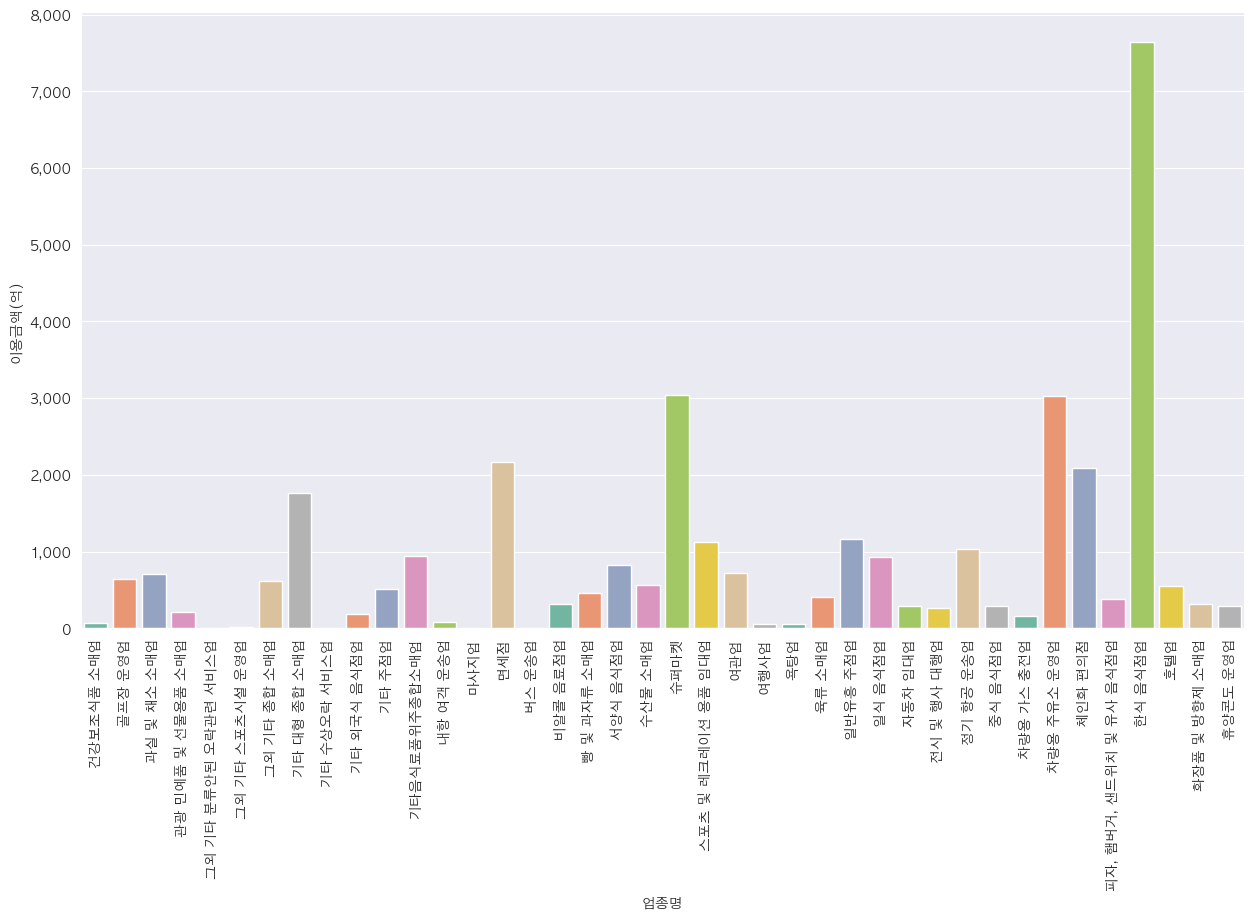

In [102]:
# 업종 별 이용금액 시각화 
plt.figure(figsize=(15,8))
sns.barplot(data = usebybiz, x = '업종명', y = '이용금액', palette = 'Set2')
plt.xticks(rotation = 90)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')
plt.show()